In [276]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [277]:
import pandas as pd

In [278]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [279]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [280]:
samples


array([0.87878788, 0.68686869, 0.75757576, ..., 0.77777778, 0.87878788,
       0.53535354])

What is the probability of observing 0.2? 
Count the times you see 0.1 in your samples and divide by total number of observations

In [281]:
sum(samples==0.2)/1e4
sum((samples >0.1) & (samples<0.2)) / 1e4

0.001

what is the probability that having 6 W in 9 throws is les then 0.5?=P(0.1)+p(0.2)+.....P(0.5) 


In [282]:
sum(samples < 0.5) / 1e4

0.1666

In [283]:
np.percentile(samples, 80)#samples is a list of our p values bootsrapped, if we sort them 80 percentile p value is =0.75

0.7575757575757577

In [284]:
np.percentile(samples, [10, 90])

array([0.45454545, 0.81818182])

In [285]:
az.hpd(samples, credible_interval=0.9)

array([0.41414141, 0.85858586])

What is the most probabale value?


In [286]:
stats.mode(samples)

ModeResult(mode=array([0.67676768]), count=array([299]))

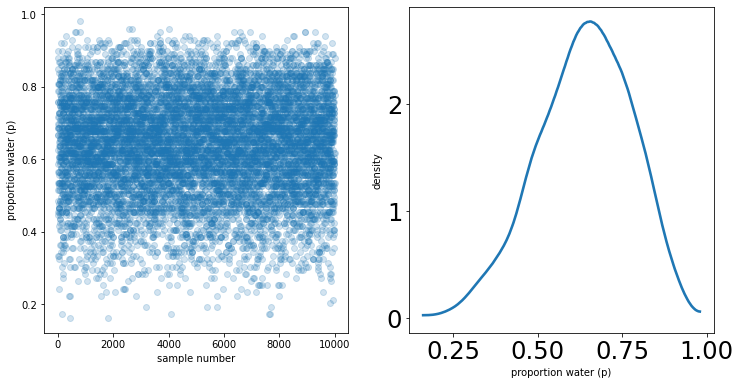

In [287]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

To summerize : Once we  get the posterior distribution we can calculate all the necassary statistics by counting.
We can kind of  do the same with pymc if you can install it..
a) Our model
fraction of water values ie p (p_grid vals) are distributed uniformly,
the number of water observations are determined with a binomial process.
likelihood = stats.binom.pmf(success, tosses, p_grid)
b) we get the posterior probability distribution
c)we create more samples from the posterior distribution
d) we start to answer some questions.




In [288]:
niter = 1000
with pm.Model() as model: # context management
    # define priors
     p = pm.Uniform('p', lower=0, upper=1)#prior

    # define likelihood
     y = pm.Binomial('y', n=9, p=p, observed=6)#likelyhood
    

In [289]:
with model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 24 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e9936d0>,
      dtype=object)

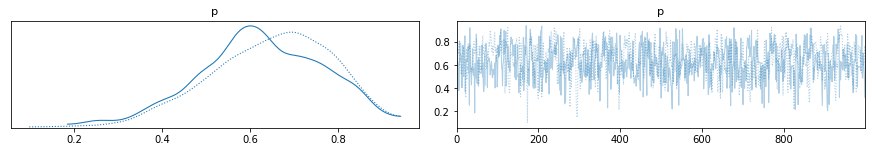

In [290]:
pm.traceplot(trace)

In [291]:
pm.summary(trace).round(2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.64,0.14,0.36,0.86,0.0,0.0,723.0,689.0,718.0,1004.0,1.01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13719ee50>],
      dtype=object)

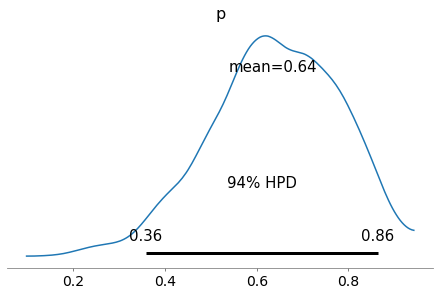

In [292]:
az.plot_posterior(trace)

This function will randomly draw 100 samples of parameters from the trace. Then, for each sample, it will draw 100 random numbers from a binomial distribution specified by the value of p in that sample.

In [293]:
ppc = pm.sample_posterior_predictive(trace, samples=1000, model=model)

/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/pymc3/sampling.py:1584: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [294]:
ppc

{'y': array([6, 5, 6, 9, 3, 2, 4, 8, 8, 5, 5, 7, 3, 3, 7, 5, 6, 5, 8, 7, 6, 4,
        5, 6, 6, 6, 8, 5, 7, 4, 6, 4, 9, 4, 4, 6, 6, 5, 7, 7, 5, 1, 2, 6,
        2, 8, 3, 4, 8, 6, 3, 8, 6, 5, 7, 7, 3, 6, 4, 1, 3, 7, 5, 3, 7, 5,
        4, 2, 6, 7, 7, 7, 8, 3, 6, 5, 9, 6, 7, 6, 6, 5, 4, 7, 5, 8, 6, 3,
        4, 5, 6, 3, 3, 4, 6, 3, 7, 7, 4, 3, 3, 7, 6, 7, 5, 9, 6, 8, 7, 8,
        6, 7, 1, 5, 5, 8, 8, 5, 6, 7, 9, 1, 5, 7, 5, 6, 8, 6, 3, 6, 6, 7,
        7, 8, 7, 8, 9, 5, 4, 6, 8, 7, 5, 8, 6, 7, 2, 6, 5, 3, 5, 3, 5, 4,
        6, 4, 7, 5, 5, 2, 5, 5, 6, 9, 3, 5, 9, 6, 8, 8, 9, 9, 5, 5, 4, 6,
        5, 4, 4, 6, 7, 7, 9, 7, 5, 6, 6, 1, 4, 3, 4, 5, 4, 2, 4, 7, 5, 6,
        8, 5, 6, 8, 1, 4, 4, 7, 8, 8, 9, 3, 3, 7, 6, 3, 5, 5, 9, 6, 4, 3,
        5, 6, 7, 7, 5, 4, 4, 9, 7, 6, 4, 5, 7, 6, 3, 5, 6, 8, 6, 7, 7, 9,
        8, 9, 7, 8, 7, 8, 6, 7, 3, 4, 5, 5, 6, 5, 3, 9, 8, 6, 5, 5, 8, 5,
        2, 6, 3, 5, 7, 5, 6, 7, 6, 5, 6, 5, 5, 7, 5, 5, 4, 8, 7, 8, 6, 5,
        8, 8, 8, 9, 6, 5, 6, 8, 5

In [295]:
np.asarray(ppc['y']).shape


(1000,)

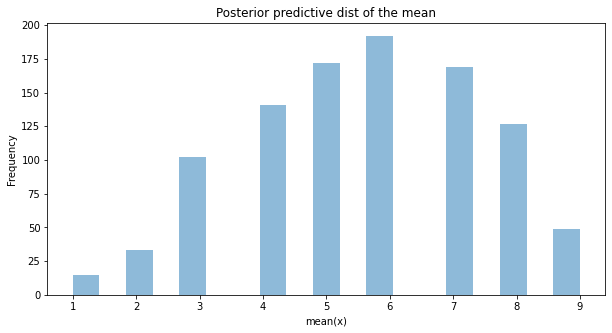

In [296]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)

ax.set(title='Posterior predictive dist of the mean', xlabel='mean(x)', ylabel='Frequency');

In [297]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

In [298]:
d.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


In [299]:
d2=d[d["age"]>=18]

In [300]:
d2.describe()

,height,weight,age,male
count,352.000000,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494,0.468750
std,7.742332,6.456708,15.967855,0.499733
min,136.525000,31.071052,18.000000,0.000000
25%,148.590000,40.256290,28.000000,0.000000
50%,154.305000,44.792210,39.000000,0.000000
75%,160.655000,49.292693,51.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134e3bd00>,
      dtype=object)

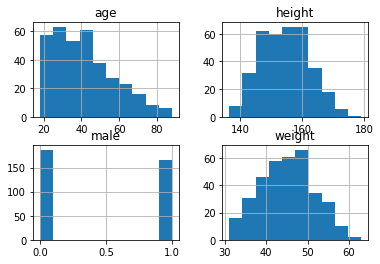

In [301]:
d2.hist()

# Gaussian Model of Height
We assume (in fact know) that th height of individuals in a soceity follows a Gaussian distribution. A gaussian distribution is defined by 2 values $$mu$$and $$sigma$$
Bayesian up- dating will allow us to consider every possible combination of values for μ and σ and to score each combination by its relative plausibility, in light of the data. These relative plausibilities are the posterior probabilities of each combination of values μ, σ.
So we can model height of  the  population by a normal distribution.
$$height  ∼  N(μ, σ)$$
So what are the values for μ, σ. There is no unique number.
What can we assume ?
a) Every possible μ is drawn from a Normal distribution.(why?)
$$ μ ∼  N(178, 20)$$
      
b) σ is always  positive 
Assume the flattest prior ie our σ's will come from a unifor distribution between 0 and 50

$$ σ ∼  Uniform(0, 50)$$

In [302]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)#mu prior
    sigma = pm.Uniform('sigma', lower=0, upper=50)#sigma prior
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])#likelyhood
    prior = pm.sample_prior_predictive(5000)
    posterior = pm.sample(5000, tune=5000)
    posterior_pred = pm.sample_posterior_predictive(posterior)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 29 seconds.


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (5000) than draws (352). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


{'sigma': array([18.09512292, 31.4923658 , 11.69305073, ..., 17.57413961,
        44.12907484, 36.52085043]),
 'height': array([[167.81139055, 177.15269603, 168.01890561, ..., 168.25003283,
         161.07672095, 155.45140851],
        [136.71732126, 160.55353003, 230.36115739, ..., 171.91496123,
         153.7145015 , 223.37359884],
        [187.95803135, 194.31546635, 193.40146139, ..., 197.78518298,
         177.59019856, 198.93985038],
        ...,
        [153.60729041, 174.63804945, 191.01668444, ..., 154.85966775,
         188.66581471, 165.59831718],
        [216.5857969 , 212.65353213, 148.79125047, ..., 247.21074889,
         216.42924738, 143.49421979],
        [149.43120844, 207.1338345 , 178.30352168, ..., 177.58436696,
         169.2145742 , 188.15965983]]),
 'sigma_interval__': array([-0.56711643,  0.53156185, -1.18663661, ..., -0.61252778,
         2.01710663,  0.99673933]),
 'mu': array([176.50006906, 188.13735154, 189.32114732, ..., 180.29431509,
        195.22306689,

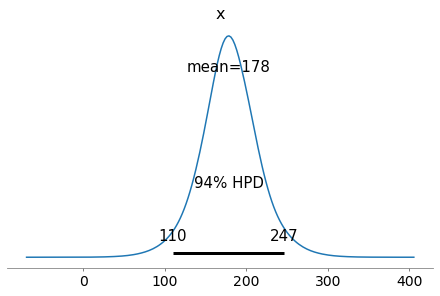

In [303]:
az.plot_posterior(prior["height"])
prior

<MultiTrace: 2 chains, 5000 iterations, 3 variables>

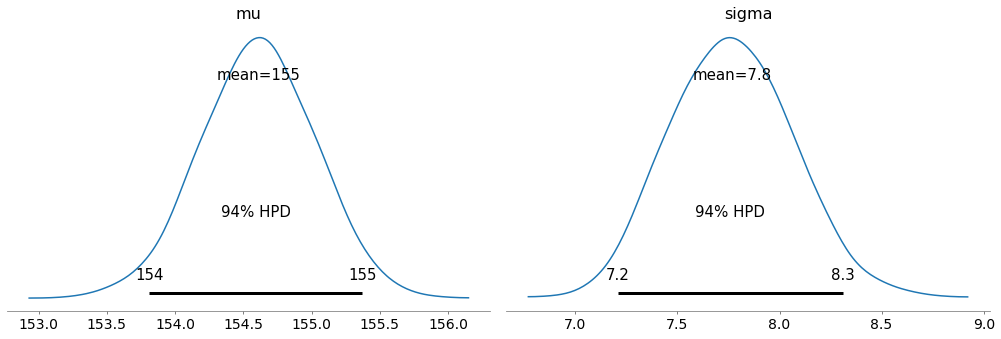

In [304]:
az.plot_posterior(posterior)
posterior

In [305]:
pm.summary(posterior).round(2)#watchout r_hat and 

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,154.61,0.42,153.81,155.37,0.0,0.0,8114.0,8112.0,8117.0,7410.0,1.0
sigma,7.77,0.30,7.21,8.31,0.0,0.0,8493.0,8459.0,8530.0,6510.0,1.0


# Linear Prediction

What we’ve done above is a Gaussian model of height in a population of adults. Typically, we are interested in modeling how an outcome is related to some other variable, a # predictor # variable. If the predictor variable has any statistical association with the outcome variable, then we can use it to predict the outcome. When the predictor variable is built inside the model in a particular way, we’ll have linear regression.
So now let’s look at how height in these Kalahari foragers (the outcome variable) covaries with weight (the predictor variable).

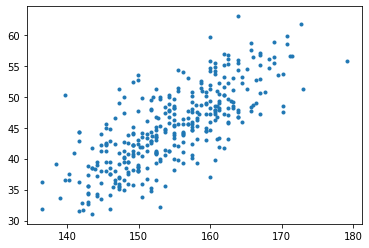

In [306]:
plt.plot(d2.height, d2.weight, '.')

The linear model strategy. The strategy is to make the parameter for the mean of a Gaussian distribution, μ, into a linear function of the predictor variable and other, new parameters that we invent. This strategy is often simply called the linear model (i.e a line):
f(x)=a*x+b

Now how do we get weight into a Gaussian model of height? Let x be the name for the column of weight measurements, d2$weight. Let the average of the x values be  ̄x, “ex bar”.
$$

hi ∼ Normal(μi, σ)

μi = α + β(xi −  ̄x)

α ∼ Normal(178, 20)

β ∼ Normal(0, 10)

σ ∼ Uniform(0, 50)

$$

1) What is the expected height when$$ xi = \tilde x$$? The parameter α answers this question, because when xi =  ̄x, μi = α. For this reason, α is often called the intercept. But we should think not in terms of some abstract line, but rather in terms of the meaning with respect to the observable variables.

(2) What is the change in expected height, when xi changes by 1 unit? The parameter β answers this question. It is often called a “slope,” again because of the abstract line. Better to think of it as a rate of change in expectation.


In [307]:
with pm.Model() as m4_3:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight#f(x)=a+b*w
    #mu = pm.Deterministic('mu', alpha + beta * d2.weight) # try uncomenting this line and comenting the above line
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 3_000 tune and 1_000 draw iterations (6_000 + 2_000 draws total) took 38 seconds.


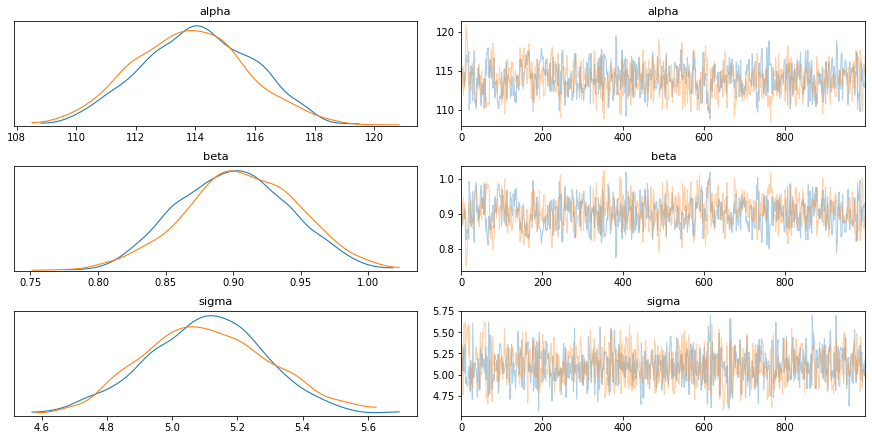

In [308]:


az.plot_trace(trace_4_3);



Notice that the variable mu is defined as alpha + beta * d2.weight in a single line. If we want the trace to containt mu we can write as a deterministic varible. The computating will be exactly the same. The only diference is that mu will be accesible in the trace.

The prediction for Bayesian linear regression is distributed:

\begin{equation}
y \sim N(\beta^{T}X, \sigma^{2} I)
\end{equation}

We estimate the model parameter distributions through Bayesian updating for infering the model parameters from a prior and likelihood from training data.

\begin{equation}
p(\beta | y, X) = \frac{p(y,X| \beta) p(\beta)}{p(y,X)}
\end{equation}

In general for continuous features, we must use a sampling method, such as Markov chain Monte Carlo to sample the posterior.


# Priors #
Why beta is Normal(0,10) ?
You might think of the model as y=a+bx+ epsilon where epsilon is Normally distributed measurment error.
Can we do better?
Look at the prior distribution:



In [309]:
with m4_3:
     prior = pm.sample_prior_predictive(5000)

In [310]:
prior

{'alpha': array([273.9061003 , 308.11880276, 182.99709771, ..., 194.04558416,
        232.00688265, 277.65039543]),
 'sigma': array([48.02578896, 44.92381907, 41.31576027, ..., 42.31303639,
         0.60994962, 41.56002429]),
 'height': array([[ 269.21922885,  203.12152771,  203.5750038 , ...,  297.56288029,
          294.69842029,  233.11356627],
        [-240.02560765, -172.46443331, -101.13832572, ..., -374.11435776,
         -357.67631213, -333.38988268],
        [-645.8211079 , -447.94362506, -404.73237708, ..., -593.3762568 ,
         -710.64902377, -700.77357909],
        ...,
        [-732.00567464, -548.06107539, -477.98599291, ..., -900.04082054,
         -927.09579242, -885.46765615],
        [-445.71283421, -284.24057605, -219.04624193, ..., -506.92339037,
         -533.58668692, -512.45622414],
        [ 589.89721654,  510.06431369,  545.77275952, ...,  555.78613017,
          625.98156389,  667.43296979]]),
 'beta': array([  0.06528877, -11.86544373, -16.77333946, ..., -2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x134d98be0>],
      dtype=object)

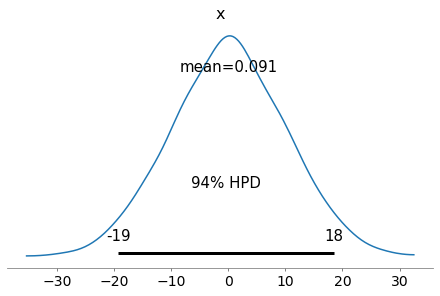

In [311]:
az.plot_posterior(prior["beta"])

In [312]:
d2

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
534,162.560,47.031821,27.0,0
537,142.875,34.246196,31.0,0
540,162.560,52.163080,31.0,1
541,156.210,54.062496,21.0,0


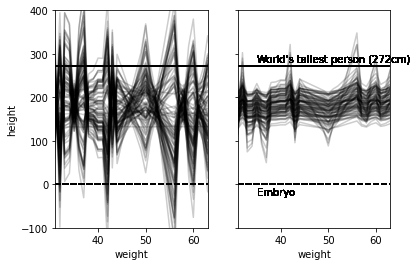

In [313]:
N=100
#x=d2["weight"][:N]
#np.random.seed(2971)

a = stats.norm.rvs(178, 20, N)
b = stats.norm.rvs(0, 10, N)
_, ax = plt.subplots(1, 2, sharey=True)
xbar = d2.weight.mean()
x=d2.weight
for i in range(N):
    ax[0].plot(a[i] + b[i] * (x - xbar), "k", alpha=0.2)
    ax[0].set_xlim(d2.weight.min(), d2.weight.max())
    ax[0].set_ylim(-100, 400)
    ax[0].axhline(0, c="k", ls="--")
    ax[0].axhline(272, c="k")
    ax[0].set_xlabel("weight")
    ax[0].set_ylabel("height")
b = stats.lognorm.rvs(s=1, scale=1, size=100)
for i in range(N):
    ax[1].plot(a[i] + b[i] * (x - xbar), "k", alpha=0.2)
    ax[1].set_xlim(d2.weight.min(), d2.weight.max())
    ax[1].set_ylim(-100, 400)
    ax[1].axhline(0, c="k", ls="--", label="embryo")
    ax[1].axhline(272, c="k")
    ax[1].set_xlabel("weight")
    ax[1].text(x=35, y=282, s="World's tallest person (272cm)")
    ax[1].text(x=35, y=-25, s="Embryo");


So an improved version would be using lognormal distribution for beta.
we have two options:
a) beta =lognormal(0,1)
   mu=alpha+beta (weight- mean(weight)) 
b)   mu <- a + exp(log_b)*( weight - xbar ),
log_b = dnorm( 0 , 1 ) ,

In [314]:
with pm.Model() as m4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
   # mu = a + b * (d2.weight-xbar )#d2.weight-xbar
    mu = pm.Deterministic("mu", a + b * (d2.weight - d2.weight.mean()))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 18 seconds.


In [315]:
az.summary(trace_4_3, kind="stats")


,mean,sd,hpd_3%,hpd_97%
a,154.598,0.273,154.058,155.077
b,0.904,0.041,0.832,0.983
sigma,5.099,0.193,4.750,5.470
mu[0],157.161,0.303,156.623,157.761
mu[1],146.907,0.431,146.085,147.696
...,...,...,...,...
mu[347],156.444,0.290,155.931,157.022
mu[348],144.882,0.505,143.874,145.757
mu[349],161.084,0.412,160.283,161.816
mu[350],162.801,0.473,161.890,163.662


In [316]:
trace_4_3_df = pm.trace_to_dataframe(trace_4_3)
trace_4_3_df.cov().round(3)#check for colinearity

,a,b,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
a,0.075,0.001,-0.001,0.076,0.070,0.067,0.080,0.073,0.086,0.071,...,0.074,0.077,0.071,0.072,0.072,0.076,0.068,0.079,0.080,0.079
b,0.001,0.002,-0.000,0.005,-0.014,-0.021,0.014,-0.006,0.031,-0.011,...,-0.001,0.005,-0.009,-0.006,-0.006,0.004,-0.017,0.013,0.016,0.013
sigma,-0.001,-0.000,0.037,-0.002,0.001,0.002,-0.004,-0.000,-0.007,0.000,...,-0.001,-0.002,0.000,-0.000,-0.000,-0.002,0.002,-0.004,-0.004,-0.004
mu__0,0.076,0.005,-0.002,0.092,0.031,0.006,0.120,0.057,0.173,0.040,...,0.071,0.092,0.047,0.055,0.054,0.087,0.019,0.115,0.125,0.117
mu__1,0.070,-0.014,0.001,0.031,0.186,0.249,-0.040,0.120,-0.176,0.162,...,0.083,0.030,0.146,0.123,0.126,0.042,0.216,-0.028,-0.054,-0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mu__347,0.076,0.004,-0.002,0.087,0.042,0.023,0.108,0.061,0.148,0.049,...,0.072,0.088,0.054,0.060,0.059,0.084,0.033,0.105,0.112,0.106
mu__348,0.068,-0.017,0.002,0.019,0.216,0.296,-0.072,0.133,-0.244,0.186,...,0.085,0.018,0.165,0.137,0.141,0.033,0.255,-0.056,-0.089,-0.063
mu__349,0.079,0.013,-0.004,0.115,-0.028,-0.086,0.181,0.032,0.306,-0.006,...,0.067,0.116,0.009,0.029,0.027,0.105,-0.056,0.169,0.193,0.174
mu__350,0.080,0.016,-0.004,0.125,-0.054,-0.127,0.207,0.022,0.364,-0.026,...,0.065,0.126,-0.008,0.018,0.014,0.112,-0.089,0.193,0.223,0.199


What is the realtion ship?
recall we have probaility dist of a, b, and sigma


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/plots/plot_utils.py:534: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (355) in plot_posterior, generating only 40 plots
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x136861d00>,
      dtype=object)

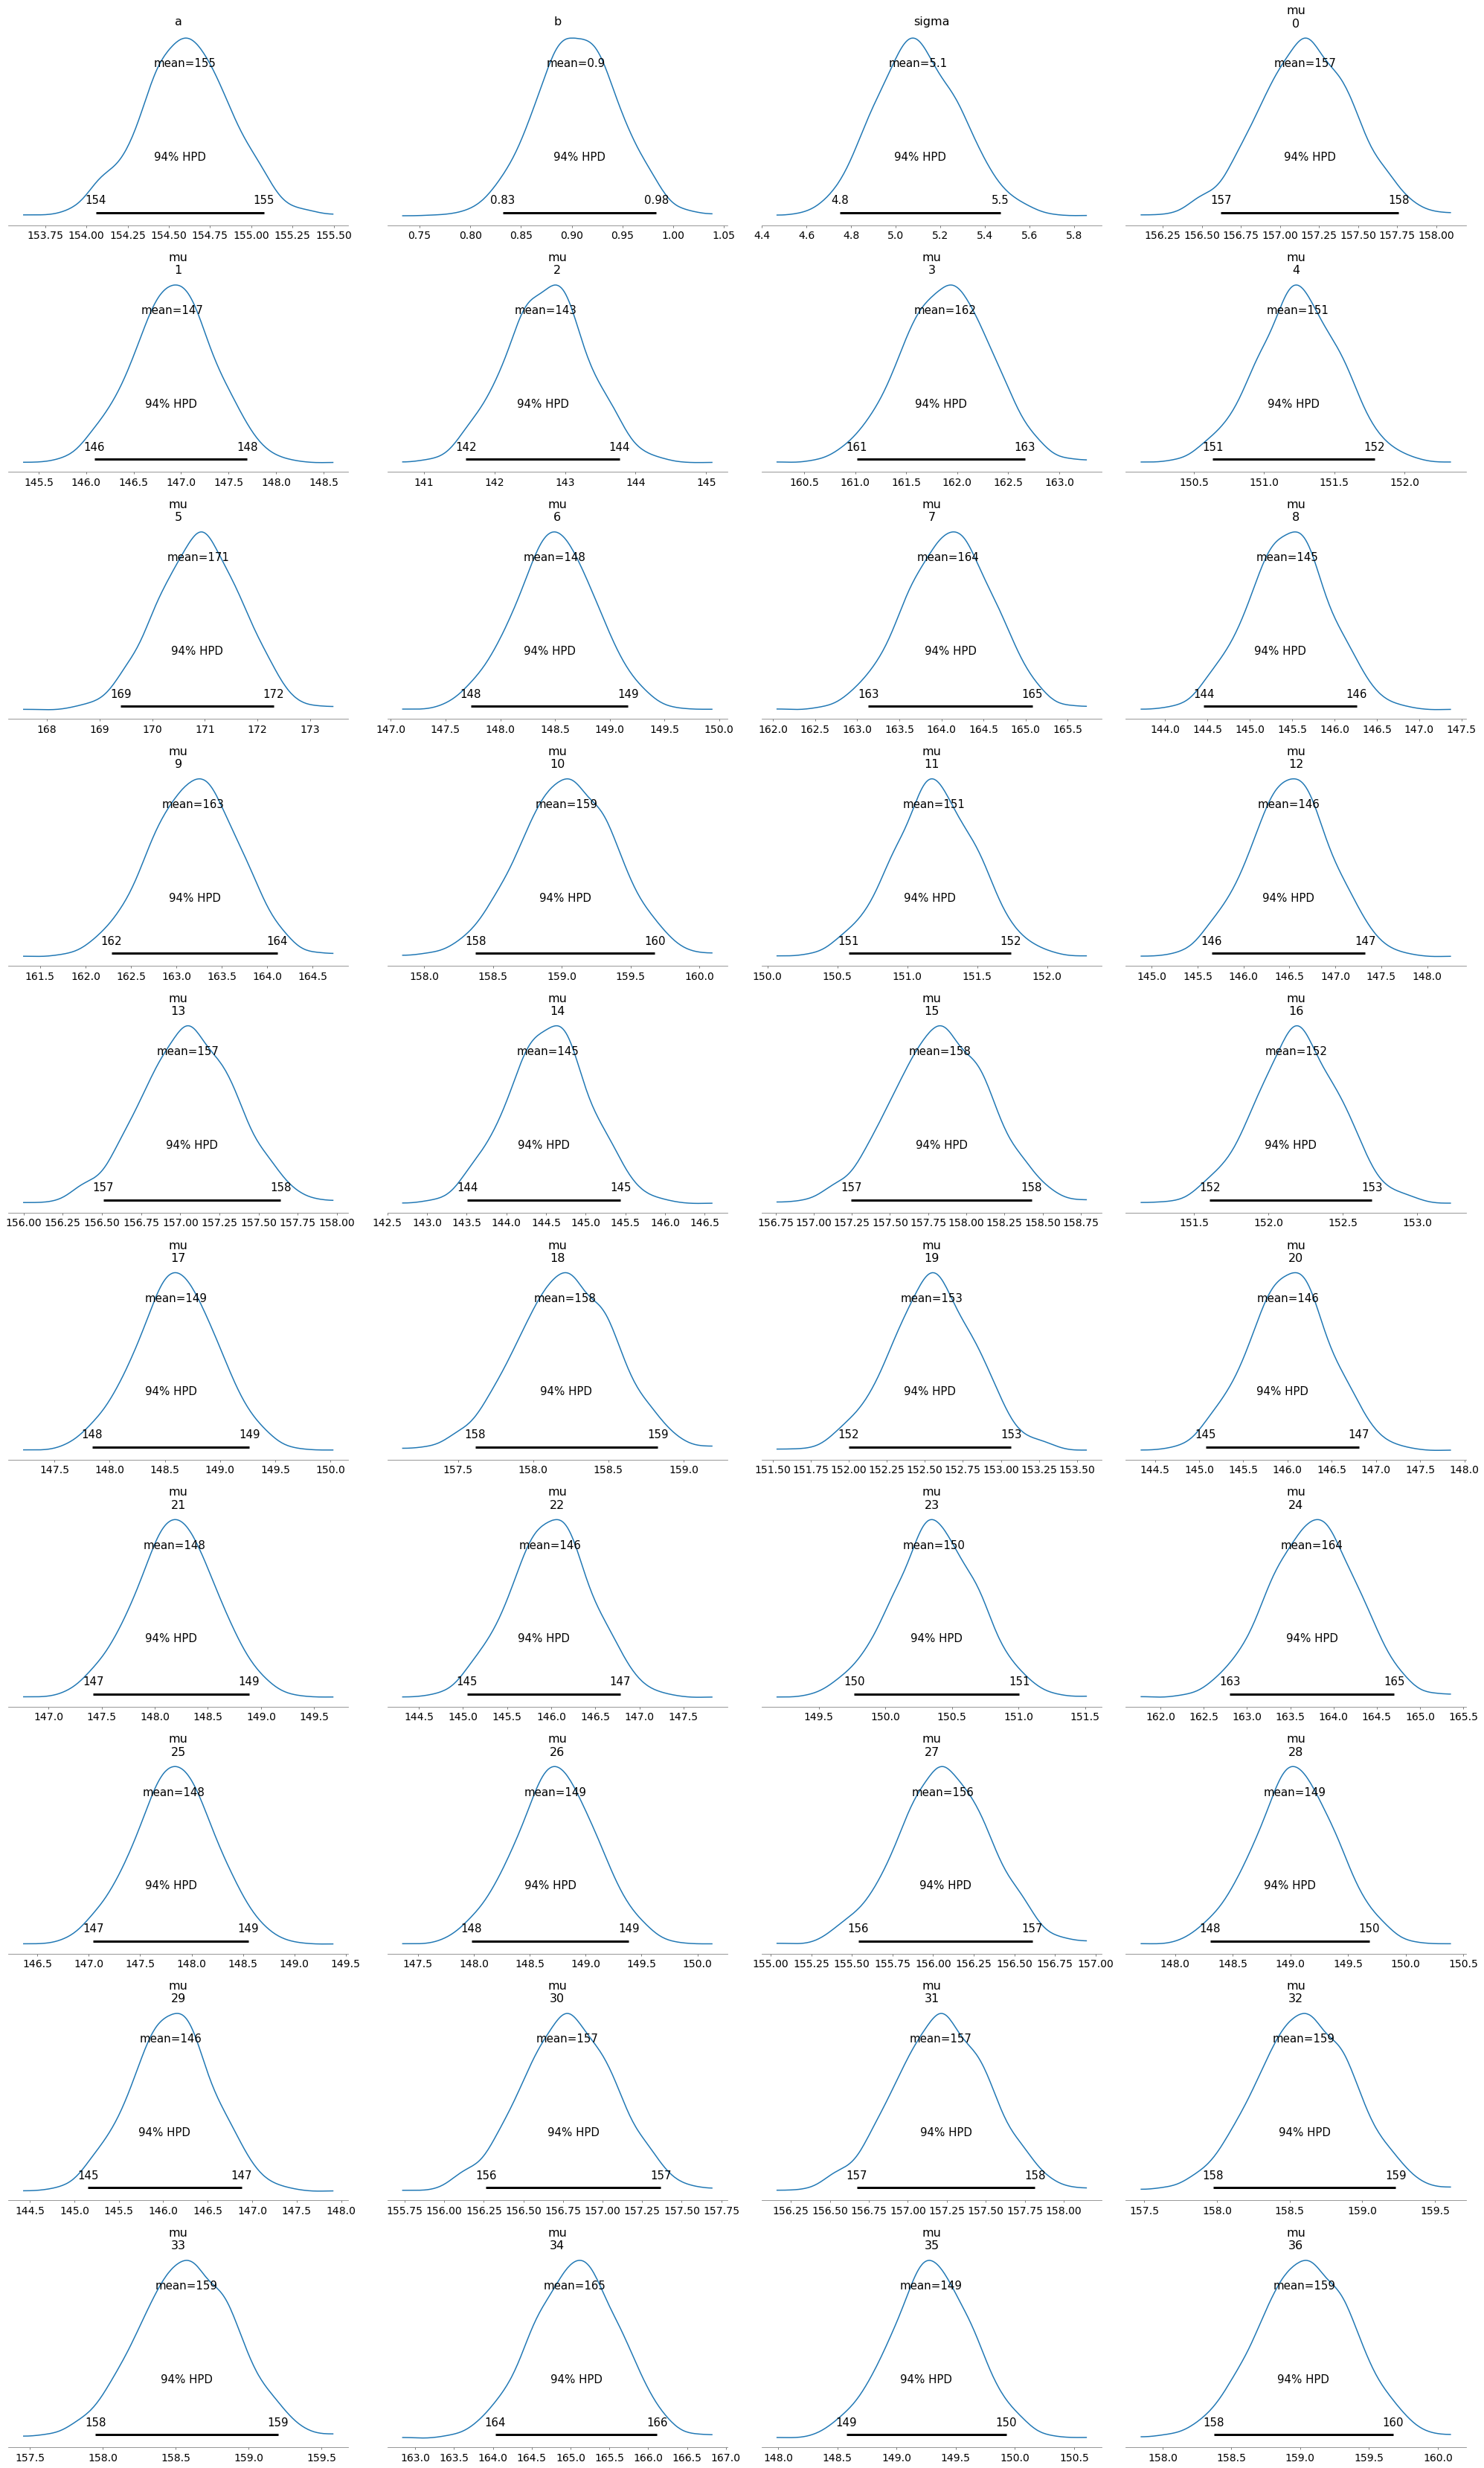

In [317]:
az.plot_posterior(trace_4_3)

We want to see a line! height(i)=alpha+beta *(weight(i)-weightbar)
Which alpha, beta?
all of them! But lets start with the most probabale value or the nearest thing ie mean.

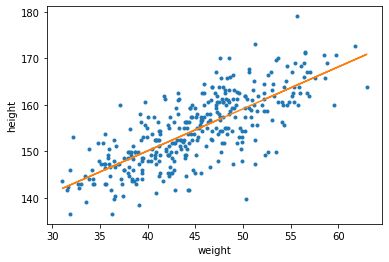

In [318]:
plt.plot(d2.weight, d2.height, ".")
plt.plot(d2.weight, trace_4_3["a"].mean() + trace_4_3["b"].mean() * (d2.weight - xbar))
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);


This is  just the mean but we had other options. Other posibilities? Or how certain am I? How can we quantify uncertainity? Sample and plot!


In [319]:
trace_4_3_df


,a,b,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
0,154.465248,0.850284,4.738812,156.875907,147.233851,143.304714,161.311253,151.307620,169.772157,148.728370,...,153.645818,156.924117,149.716681,151.114779,150.921938,156.200963,145.329545,160.563993,162.179038,160.877360
1,154.590778,0.867916,4.847159,157.051425,147.209430,143.198817,161.578743,151.367673,170.215093,148.734940,...,153.754357,157.100635,149.743744,151.170833,150.973993,156.362486,145.265636,160.815988,162.464522,161.135853
2,154.556264,0.844421,5.141690,156.950300,147.374733,143.472689,161.355061,151.420410,169.757621,148.858946,...,153.742485,156.998178,149.840441,151.228899,151.037387,156.280010,145.483558,160.612954,162.216862,160.924160
3,154.700242,0.947204,4.951468,157.385680,146.644573,142.267572,162.326590,151.182691,171.751911,148.309445,...,153.787409,157.439386,149.410408,150.967869,150.753047,156.633803,144.523204,161.494154,163.293289,161.843240
4,154.514653,0.901280,5.261858,157.069890,146.849558,142.684773,161.771243,151.167648,170.739585,148.433710,...,153.646079,157.120992,149.481294,150.963242,150.758835,156.354467,144.831042,160.979167,162.691073,161.311328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,154.821956,0.917991,4.817923,157.424572,147.014737,142.772729,162.213097,151.412892,171.347728,148.628261,...,153.937277,157.476622,149.695269,151.204696,150.996499,156.695884,144.958794,161.406334,163.149982,161.744654
1996,154.490765,0.897638,4.913251,157.035676,146.856645,142.708690,161.718030,151.157286,170.650129,148.434395,...,153.625701,157.086571,149.477746,150.953705,150.750124,156.323144,144.846287,160.929155,162.634143,161.259974
1997,154.544868,0.924498,4.909663,157.165930,146.682313,142.410239,161.988394,151.111641,171.187768,148.307274,...,153.653919,157.218348,149.381845,150.901969,150.692297,156.432077,144.611799,161.175914,162.931920,161.516632
1998,154.544868,0.924498,4.909663,157.165930,146.682313,142.410239,161.988394,151.111641,171.187768,148.307274,...,153.653919,157.218348,149.381845,150.901969,150.692297,156.432077,144.611799,161.175914,162.931920,161.516632


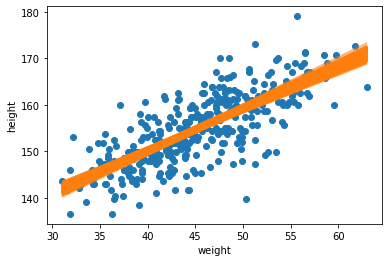

In [320]:
plt.plot(d2.weight, d2.height, "C0o")
idxs = np.random.randint(len(trace_4_3), size=352)
for idx in idxs:
    plt.plot(
        d2.weight,
        trace_4_3["a"][idx] + trace_4_3["b"][idx] * (d2.weight - d2.weight.mean()),
        "C1-",
        alpha=0.5,
    )
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

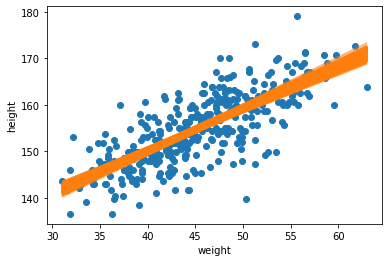

In [321]:
plt.plot(d2.weight, d2.height, "C0o")
for idx in idxs:
    plt.plot(d2.weight, trace_4_3["mu"][idx], "C1-", alpha=0.5)
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

What  is  the uncertainity ? : usually we give uncertainty displayed by plotting an interval or contour around the average regression line.
Start with unceartinity of a single value?
What is the height of a Khalari individual who weighs 50 kg?


In [322]:
mu_at_50 = trace_4_3["a"] + trace_4_3["b"] * (50 - d2.weight.mean())






In [323]:
mu_at_50

array([158.72476016, 158.93861633, 158.78640385, ..., 159.17615182,
       159.17615182, 159.04152387])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a8ba760>],
      dtype=object)

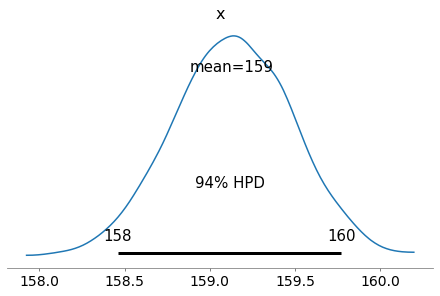

In [324]:
az.plot_posterior(mu_at_50)

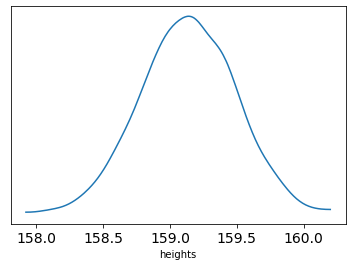

In [325]:
az.plot_kde(mu_at_50)
plt.xlabel("heights")
plt.yticks([]);


In [326]:
az.hpd(mu_at_50)

array([158.45918567, 159.77268844])

So we can repeat the procedure for all the values ar a sub sample of them.


array([156.87590714, 157.05142523, 156.95029998, ..., 157.16593038,
       157.16593038, 157.1306566 ])

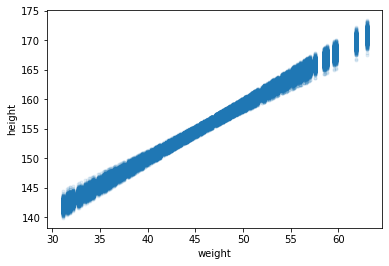

In [327]:
weight_seq = d2.weight#np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
trace_4_3_thinned = trace_4_3#[::10]
mu_pred = np.zeros((len(weight_seq), len(trace_4_3_thinned) * trace_4_3.nchains))#just container
for i, w in enumerate(weight_seq):
    mu_pred[i] = trace_4_3_thinned["a"] + trace_4_3_thinned["b"] * (
        w - d2.weight.mean()
    )
plt.plot(weight_seq, mu_pred, "C0.", alpha=0.1)
plt.xlabel("weight")
plt.ylabel("height");

mu_pred[0]

Or draw the most probable line with hpd around it


In [328]:
mu_mean = mu_pred.mean(1)
mu_hpd = az.hpd(mu_pred.T)

/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (2000) than draws (352). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


Or more easily ....


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (2000) than draws (352). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


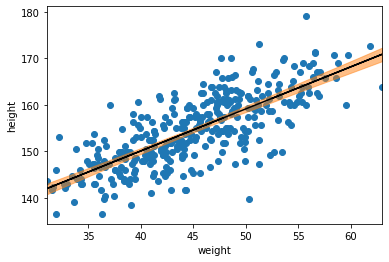

In [329]:
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, "k")
az.plot_hpd(weight_seq, mu_pred.T)
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

# Prediction intervals #
What we have found is prediction interval for μ . 
What is the prediction value for height?
Recall

# hi ∼ Normal(μi, σ) #
i.e height values are normally distributed with a std of its own σ
We have to incorparete it to our result.

<ul>
    <li> What you’ve done so far is just use samples from the posterior to visualize the uncertainty in μi, the linear model of the mean.</li>   
    <li> But actual predictions of heights depend also upon the distribution in the first line (the gaussian). </li> 
    <li>The Gaussian distribution on the first line tells us that the model expects observed heights to be distributed around μ, not right on top of it.  </li> 
    <li> And the spread around μ is governed by σ. All of this suggests we need to incorporate σ in the predictions somehow</li> 
   
 </ul>

# How ? #
<ul> Imagine simulating heights.
    <li>For any unique weight value,  sample from a Gaussian distribution with the correct mean μ for that weight, using the correct value of σ sampled from the same posterior distribution. </li> 
     <li> If you do this for every sample from the posterior, for every weight value of interest, you end up with a collection of simu- lated heights that embody the uncertainty in the posterior as well as the uncertainty in the Gaussian distribution of heights.  </li> 
     
</ul>    Pymc does most of the work for us

In [330]:
#sample from posterior

height_pred = pm.sample_posterior_predictive(trace_4_3, 200, m4_3)



/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/pymc3/sampling.py:1584: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [331]:
height_pred_hpd = az.hpd(height_pred["height"])# sigma values for each height (kind of, indeed credible interval)

/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (2000) than draws (352). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


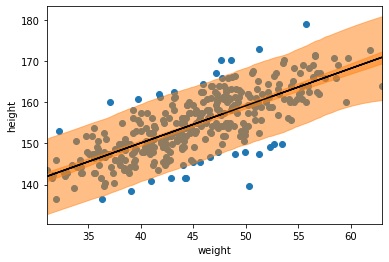

In [332]:
plt.scatter(d2.weight, d2.height)
az.plot_hpd(weight_seq, mu_pred.T)#unceartainity around mu
az.plot_hpd(d2.weight, height_pred["height"])#uncertainity around the height values
plt.plot(weight_seq, mu_mean, "k")# the most probabşe value
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());




# Another example#
 'GrainSize_por.csv' is  a comma delimited file with 20 grain size ($mm$) and porosity (as a percentage) measures from the subsurface.  We will be looking for a  linear relationship among the grain size and porosity.
 1 )Load and examine the data# Data#  


In [333]:
df = pd.read_csv("data/GrainSize_Por.csv") 
df.head()




,Grainsize,Porosity
0,2.689284,5.400000
1,6.683638,10.647582
2,9.877106,7.926271
3,12.239344,11.278953
4,27.623312,10.508753


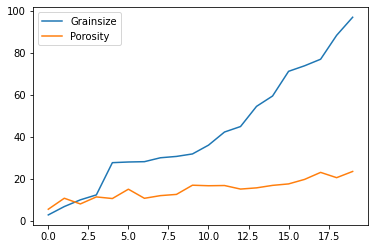

In [334]:
df.plot()



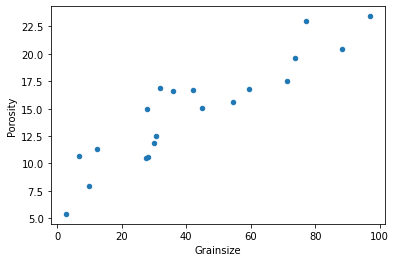

In [335]:
x1 = df.plot.scatter(x='Grainsize',

                      y='Porosity')

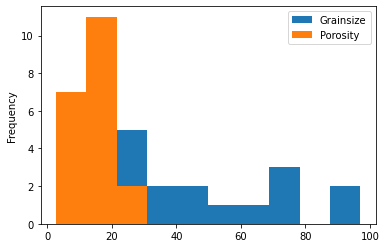

In [336]:
df.plot.hist()

In [337]:
df.describe()

,Grainsize,Porosity
count,20.000000,20.000000
mean,42.600804,14.866505
std,27.585240,4.784658
min,2.689284,5.400000
25%,27.862080,11.121110
50%,33.882755,15.312418
75%,62.379733,17.021040
max,97.022766,23.431172


2 ) Build the  bayesian model:
Porosity=alpha + beta*grainssize
assumptions (or aproximations): 
porosity is Normally distributed around a Mu with a stable sigma value which is asssumed to be the linear function=alpla + beta*grainssize
identify the parameters : alpha, beta, muporosity, sigmaporosity




In [338]:
with pm.Model() as porousgrain:
    alpha = pm.Normal("alpha", mu=0, sd=10)
    beta = pm.Normal("beta", mu=0, sd=10)
    sigma = pm.HalfNormal("sigma",sd= 10)
   # mu = a + b * (d2.weight-xbar )#d2.weight-xbar
    mu = pm.Deterministic("mu", alpha+ beta * df["Grainsize"])
    porosityobserved = pm.Normal("porosityobserved", mu=mu, sd=sigma, observed=df["Porosity"])


 

3) Make the prior predictive checks

In [339]:
prior_predictive = pm.sample_prior_predictive(samples=5000, model=porousgrain)

In [340]:
prior_predictive

{'alpha': array([-15.61943668, -14.81941784,  -1.73257455, ...,   4.21791914,
         -2.59589656,  -3.05686872]),
 'sigma': array([ 8.02835726,  0.70956722, 26.70151654, ...,  2.99014788,
         7.45180193,  0.58354599]),
 'porosityobserved': array([[ 2.42462486e-01,  4.42351264e+01,  7.48233043e+01, ...,
          7.75584308e+02,  9.00436508e+02,  9.93363308e+02],
        [-2.51184338e+01, -3.91725621e+01, -5.14722417e+01, ...,
         -3.10285116e+02, -3.53140840e+02, -3.85997595e+02],
        [ 4.35889438e+01,  1.19341798e+02,  1.31079820e+02, ...,
          9.40803514e+02,  1.08871712e+03,  1.22705118e+03],
        ...,
        [-5.96835365e+00, -2.20095907e+01, -2.95208477e+01, ...,
         -2.67967140e+02, -3.08789908e+02, -3.38447653e+02],
        [-2.68786747e+01, -6.71806073e+01, -8.84918780e+01, ...,
         -6.41142317e+02, -7.59272668e+02, -8.14733324e+02],
        [ 1.65387757e+01,  4.60496575e+01,  6.79499817e+01, ...,
          5.54251223e+02,  6.38151549e+02,  7.

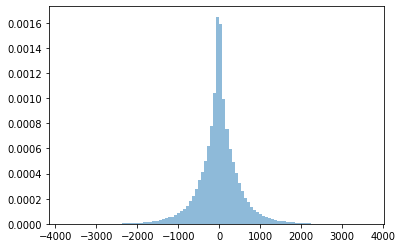

In [341]:
y=df["Porosity"]
plt.hist(prior_predictive['porosityobserved'].flatten(), bins=100, density=True, alpha=0.5)


plt.show()

(array([0.02772976, 0.02772976, 0.08318927, 0.08318927, 0.        ,
        0.08318927, 0.13864878, 0.02772976, 0.02772976, 0.05545951]),
 array([ 5.4       ,  7.20311718,  9.00623436, 10.80935154, 12.61246872,
        14.4155859 , 16.21870309, 18.02182027, 19.82493745, 21.62805463,
        23.43117181]),
 <a list of 10 Patch objects>)

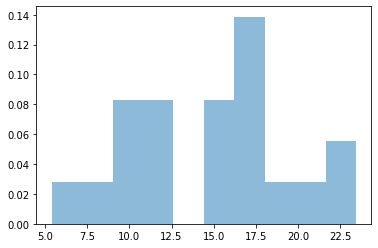

In [342]:
plt.hist(y,density=True, alpha=0.5)

In [343]:
α_prior = prior_predictive['alpha'].mean()
β_prior = prior_predictive['beta'].mean()
σ_prior = prior_predictive['sigma'].mean()

α_prior, β_prior, σ_prior

(0.010898783814000688, -0.13509487690370214, 7.979050445124696)

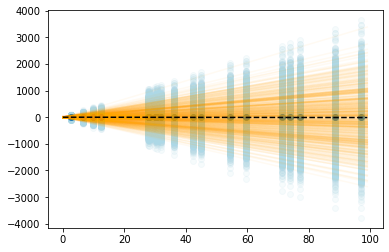

In [344]:
grid = np.arange(0, 100, 1)

# prior predictive distribution: the distribution of our predictions
for y_pred in prior_predictive['porosityobserved']:
    plt.scatter(df["Grainsize"], y_pred, alpha=0.1, color='lightblue') 

# sample of predicted regression lines
for i in np.random.randint(0, len(prior_predictive['porosityobserved']), size=500):
    plt.plot(grid, prior_predictive['alpha'][i] + prior_predictive['beta'][i]*grid, color='orange', alpha=0.05)
    
# observed data
plt.scatter(df["Grainsize"], df["Porosity"])



# prior point estimate (prior mean) for the regression line
plt.plot(grid, α_prior + β_prior*grid, '--', color='black')

plt.show()

Sample from the posterior

In [345]:
with porousgrain:
    traceporgr = pm.sample(5000, cores=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sigma, beta, alpha]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 42 seconds.
The acceptance probability does not match the target. It is 0.8933155425751216, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/pymc3/plots/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13141e820>,
      dtype=object)

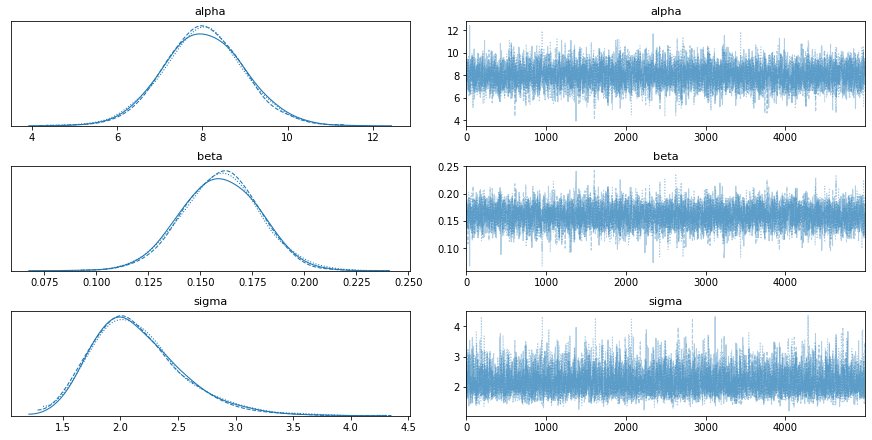

In [346]:
pm.traceplot(traceporgr, varnames=['alpha', 'beta', 'sigma'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13d1e5bb0>,
      dtype=object)

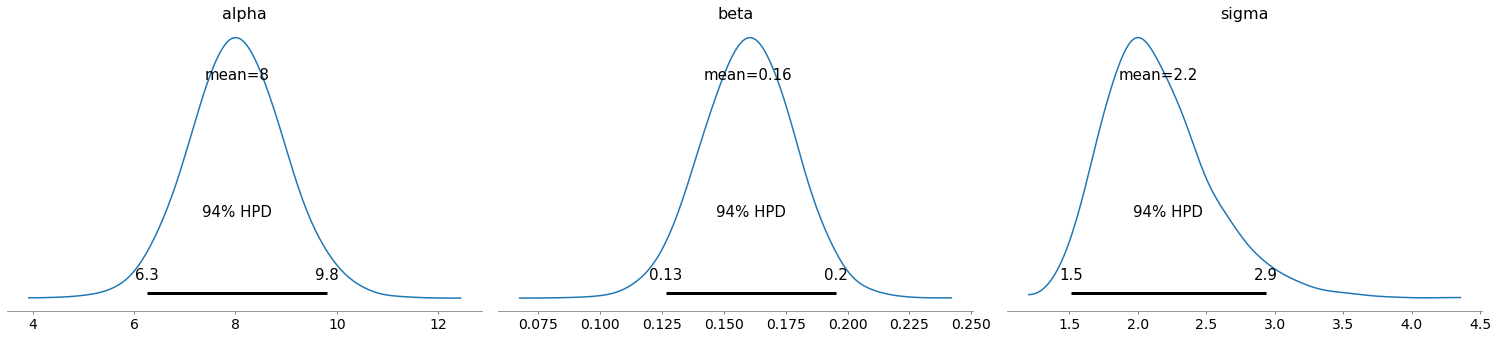

In [347]:
pm.plot_posterior(traceporgr,var_names=['alpha','beta','sigma'])


## Posterior & posterior predictive distributions

[*Posterior predictive checks*](https://stats.stackexchange.com/a/125576/35989), i.e. "simulating replicated data under the fitted model and then comparing these to the observed data" ([Gelman and Hill, 2007, p. 158](http://www.stat.columbia.edu/~gelman/arm/)),  are an important step in validating the results from a Bayesian model. Posterior predictive checks are meant for checking if the simulated "possible" values of the predicted variable $y$ are similar to the observed values of the variable.

Among simple, yet helpful, posterior predictive checks, we can mention so-called [*Bayesian $p$-values*](https://stats.stackexchange.com/questions/171386/what-are-bayesian-p-values) \([Gelman, 2003](http://www.stat.columbia.edu/~gelman/research/published/isr.pdf)\), i.e. *probabilities that sample statistic $T(y)$ are more extreme then the a posteriori simulated outcomes $T(y^\text{rep})$*, for some statistic $T$:

$$
p\operatorname{-value}(y|\theta) = \Pr(\,T(y^\text{rep}) > T(y)|y\,)
$$

In [348]:
α_pred = traceporgr['alpha'].mean()
β_pred = traceporgr['beta'].mean()
σ_pred = traceporgr['sigma'].mean()

α_pred, β_pred, σ_pred

(8.032068643139043, 0.15984521524842477, 2.15330531742699)

In [349]:
posterior_predictive = pm.sample_posterior_predictive(traceporgr, samples=500, model=porousgrain)

/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/pymc3/sampling.py:1584: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


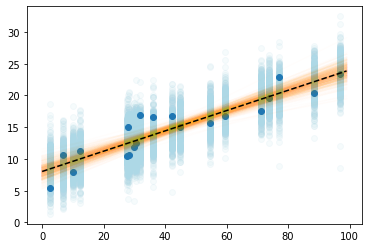

In [350]:
# posterior predictive distribution: the distribution of our predictions
for y_pred in posterior_predictive['porosityobserved']:
    plt.scatter(df["Grainsize"], y_pred, alpha=0.1, color='lightblue') 

# sample of predicted regression lines
for i in np.random.randint(0, 5000*3, size=500):
    plt.plot(grid, traceporgr['alpha'][i] + traceporgr['beta'][i]*grid, color='orange', alpha=0.01)

# observed data
plt.scatter(df["Grainsize"], df["Porosity"])



# point estimate (posterior mean) for the regression line
plt.plot(grid, α_pred + β_pred*grid, '--', color='black')

plt.show()

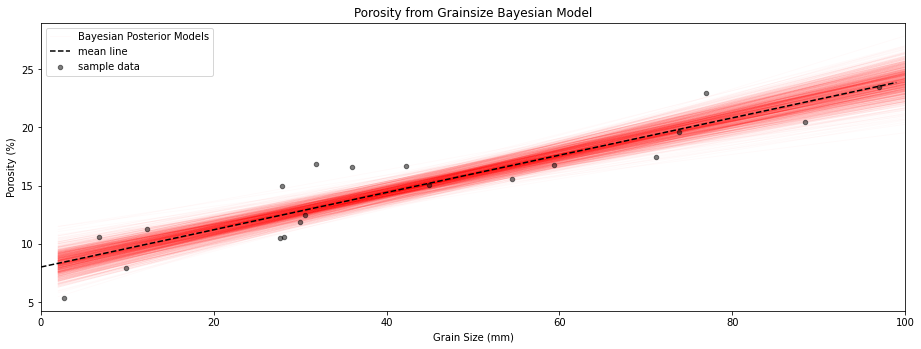

In [357]:

plt.subplot(111)
plt.scatter(df["Grainsize"], df["Porosity"], color='black', s = 20, alpha = 0.5, label='sample data', zorder = 3)
pm.plot_posterior_predictive_glm(traceporgr, samples = 1000, eval=np.linspace(2, 100, 100), linewidth = 1, color = 'red', alpha = 0.02, label = 'Bayesian Posterior Models',lm = lambda x, sample: sample['alpha'] + sample['beta'] * x, zorder = 1)
plt.plot(grid, α_pred + β_pred*grid, '--', label='mean line',color='black')
plt.title('Porosity from Grainsize Bayesian Model'); plt.xlabel('Grain Size (mm)'); plt.ylabel('Porosity (%)')
plt.xlim(0,100)#; plt.ylim(0,1500000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

# Posterior Prediction #
What is the probability distribution of porosisty for a grain size of 40 mm .


array([<matplotlib.axes._subplots.AxesSubplot object at 0x134aaddf0>],
      dtype=object)

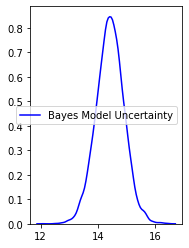

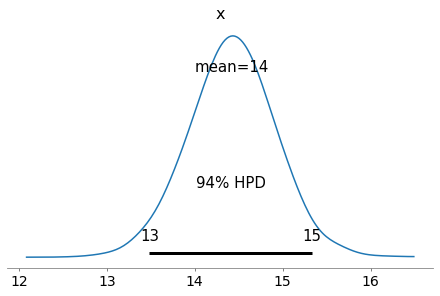

In [366]:
import seaborn as sns
grain_size = 40

plt.subplot(122)
model_uncert = traceporgr['alpha'] + traceporgr['beta'] * grain_size
sns.kdeplot(model_uncert, label = 'Bayes Model Uncertainty', color = 'blue')
az.plot_posterior(model_uncert)


In [367]:
posterior_predictive

{'porosityobserved': array([[ 5.99763476,  6.19092491, 14.18520136, ..., 22.00599196,
         23.55479409, 26.26070244],
        [ 7.55882769, 10.07275087, 10.65271465, ..., 22.64080288,
         21.66028883, 22.88153798],
        [11.45730005, 10.44706064,  6.42442303, ..., 21.34467197,
         24.06131173, 26.25478701],
        ...,
        [ 9.84402962, 10.90666062, 10.49438401, ..., 22.65911745,
         21.27506663, 23.72323491],
        [ 3.29121601,  4.44822662, 13.36143565, ..., 18.31299803,
         21.77533069, 22.91239857],
        [10.69501529,  9.33906392,  4.26568912, ..., 17.18836415,
         21.5065572 , 26.96366267]])}

In [391]:
idx = np.argsort(df["Grainsize"])
x_ord=idx[0]


/Users/gokhansahin/opt/anaconda3/envs/stat-rethink2-pymc3/lib/python3.8/site-packages/arviz/data/base.py:141: UserWarning: More chains (500) than draws (20). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


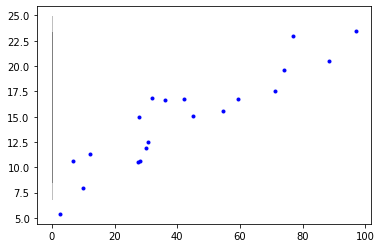

In [398]:
plt.plot(df["Grainsize"], df["Porosity"], 'b.')
sig0 = pm.hpd(posterior_predictive['porosityobserved'], credible_interval=0.05)
sig1 = pm.hpd(posterior_predictive['porosityobserved'],credible_interval=0.5)
plt.fill_between(x_ord, sig0[:,0], sig0[:,1], color='gray', alpha=1)
plt.fill_between(x_ord, sig1[:,0], sig1[:,1], color='gray', alpha=0.5)

# Challenger disaster #
On January 28, 1986, the twenty-fifth flight of the U.S. space shuttle program ended in disaster when one of the rocket boosters of the Shuttle Challenger exploded shortly after lift-off, killing all seven crew members. The presidential commission on the accident concluded that it was caused by the failure of an O-ring in a field joint on the rocket booster, and that this failure was due to a faulty design that made the O-ring unacceptably sensitive to a number of factors including outside <B>temperature<B>. <ul>
   <li> Of the previous <B>24 </B>flights, data were available on failures of O-rings on <B>23</B>, (one was lost at sea), and these data were discussed on the evening preceding the Challenger launch,</li>
    <li>  but unfortunately only the data corresponding to the <B>7</B> flights on which there was a damage incident were considered important and these were thought to show no obvious trend. </li>The data are shown below:
    </ul>